In [14]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV file to check its structure
file_path = 'golfprices.csv'
golf_data = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
golf_data.head()

,Prefecture,Price
0,tochigi,4819
1,tochigi,7728
2,tochigi,8546
3,tochigi,4819
4,tochigi,4819


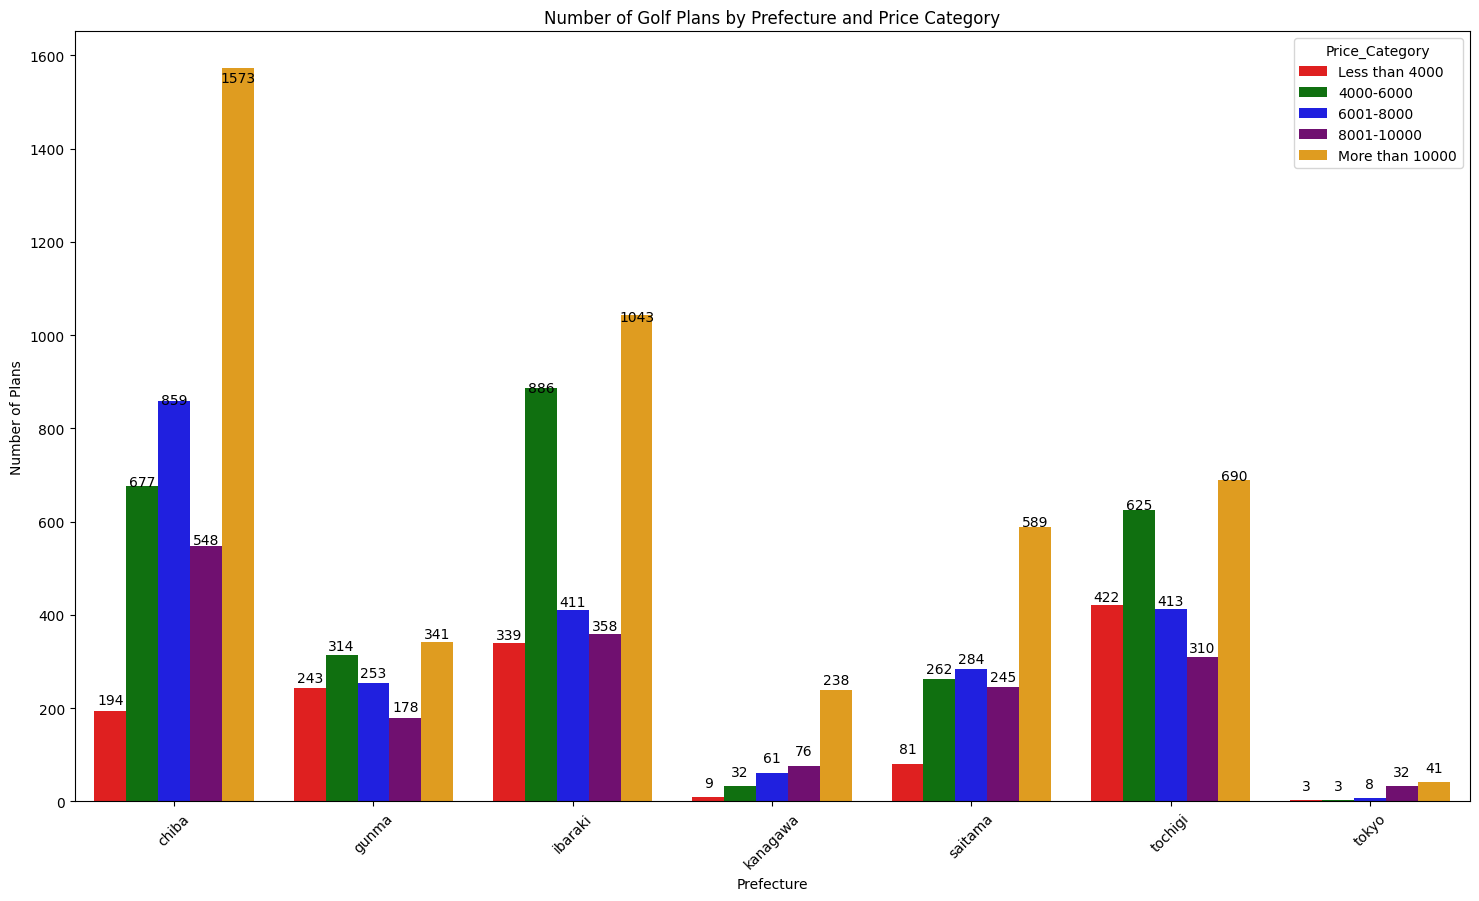

In [18]:
# Step 1: Revise the function to categorize the data based on the new price range categories
def categorize_price(price):
    if price < 4000:
        return 'Less than 4000'
    elif 4000 <= price <= 6000:
        return '4000-6000'
    elif 6001 <= price <= 8000:
        return '6001-8000'
    elif 8001 <= price <= 10000:
        return '8001-10000'
    else:
        return 'More than 10000'

# Apply the new categorization function
golf_data['Price_Category'] = golf_data['Price'].apply(categorize_price)


# Step 2: Count the number of plans per prefecture for each category
plan_count_by_category = golf_data.groupby(['Prefecture', 'Price_Category']).size().reset_index(name='Plan_Count')

# Step 3: Visualization with new categories and sorted by price categories
plt.figure(figsize=(18, 10))
palette = {
    "Less than 4000": "red", 
    "4000-6000": "green", 
    "6001-8000": "blue", 
    "8001-10000": "purple",
    "More than 10000": "orange"
}

# Create the barplot
sns.barplot(x='Prefecture', y='Plan_Count', hue='Price_Category', 
            data=plan_count_by_category, 
            hue_order=['Less than 4000', '4000-6000', '6001-8000', '8001-10000', 'More than 10000'],
            palette=palette)

# Annotate each bar with the respective value
for p in plt.gca().patches:
    vertical_offset = p.get_height() // 30  # Slight vertical offset to avoid overlap
    y_position = p.get_height() - vertical_offset if p.get_height() > 100 else p.get_height() + vertical_offset
    
    plt.gca().annotate(f"{int(p.get_height())}", 
                       (p.get_x() + p.get_width() / 2., y_position), 
                       ha='center', 
                       va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points',
                       fontsize=10,
                       color='black')

plt.title('Number of Golf Plans by Prefecture and Price Category')
plt.xlabel('Prefecture')
plt.ylabel('Number of Plans')
plt.xticks(rotation=45)
plt.show()

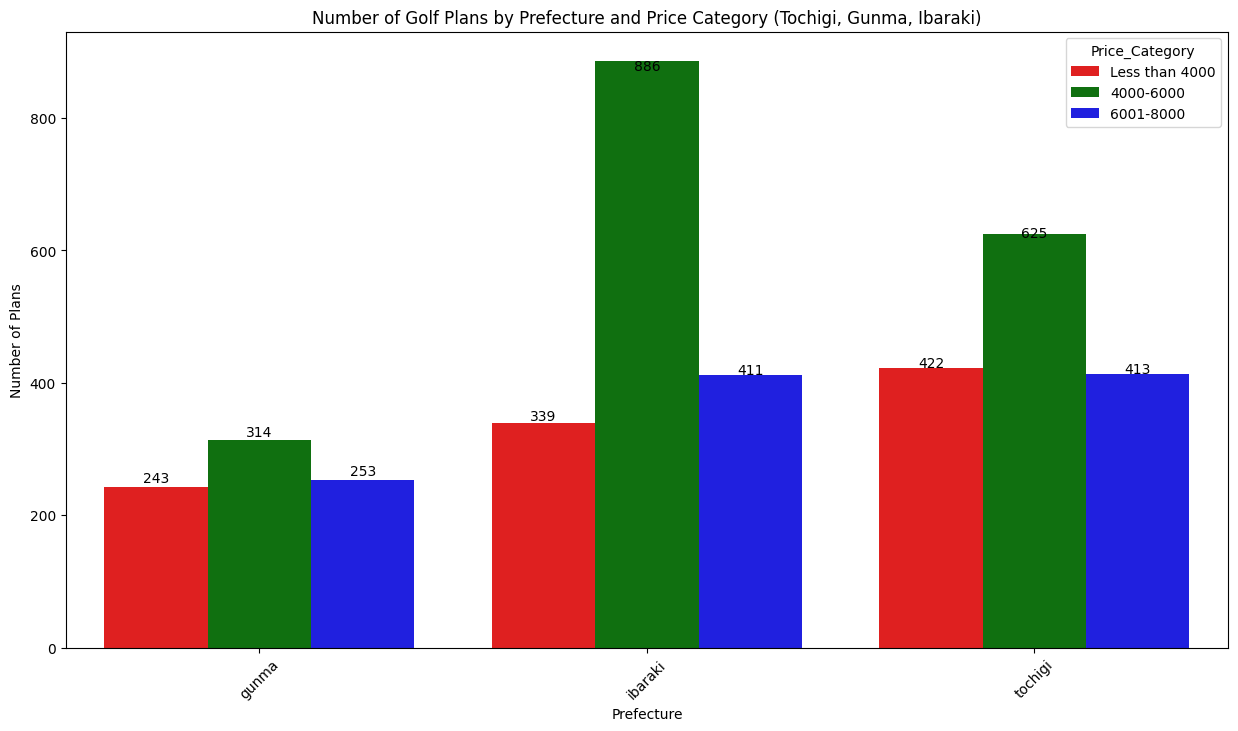

In [24]:
# Filter the data to include only the prefectures: Tochigi, Gunma, and Ibaraki
filtered_golf_data = golf_data[golf_data['Prefecture'].isin(['tochigi', 'gunma', 'ibaraki'])]

# Count the number of plans per prefecture for each category within the filtered data
plan_count_by_category_filtered = filtered_golf_data.groupby(['Prefecture', 'Price_Category']).size().reset_index(name='Plan_Count')

# Create the visualization with new categories and sorted by price categories, filtered for the 3 selected prefectures
plt.figure(figsize=(15, 8))
palette = {
    "Less than 4000": "red", 
    "4000-6000": "green", 
    "6001-8000": "blue", 
}

# Create the barplot
sns.barplot(x='Prefecture', y='Plan_Count', hue='Price_Category', 
            data=plan_count_by_category_filtered, 
            hue_order=['Less than 4000', '4000-6000', '6001-8000'],
            palette=palette)

# Annotate each bar with the respective value
for p in plt.gca().patches:
    vertical_offset = p.get_height() // 30  # Slight vertical offset to avoid overlap
    y_position = p.get_height() - vertical_offset if p.get_height() > 100 else p.get_height() + vertical_offset
    
    plt.gca().annotate(f"{int(p.get_height())}", 
                       (p.get_x() + p.get_width() / 2., y_position), 
                       ha='center', 
                       va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points',
                       fontsize=10,
                       color='black')

plt.title('Number of Golf Plans by Prefecture and Price Category (Tochigi, Gunma, Ibaraki)')
plt.xlabel('Prefecture')
plt.ylabel('Number of Plans')
plt.xticks(rotation=45)
plt.show()

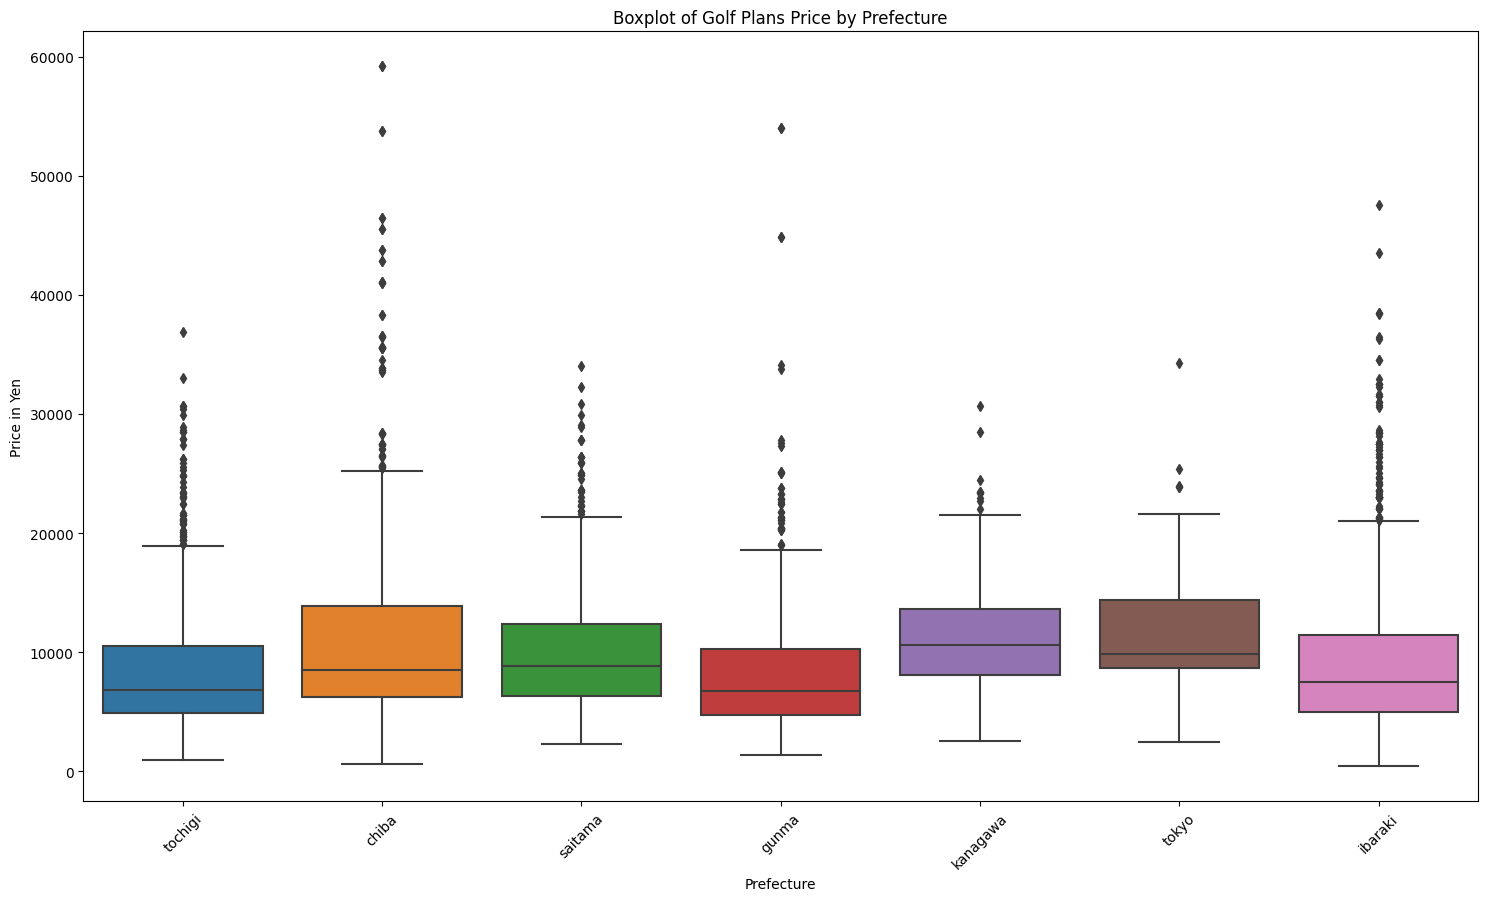

In [4]:
# Create a boxplot for price distribution across different prefectures
plt.figure(figsize=(18, 10))
sns.boxplot(x='Prefecture', y='Price', data=golf_data)
plt.title('Boxplot of Golf Plans Price by Prefecture')
plt.xlabel('Prefecture')
plt.ylabel('Price in Yen')
plt.xticks(rotation=45)
plt.show()

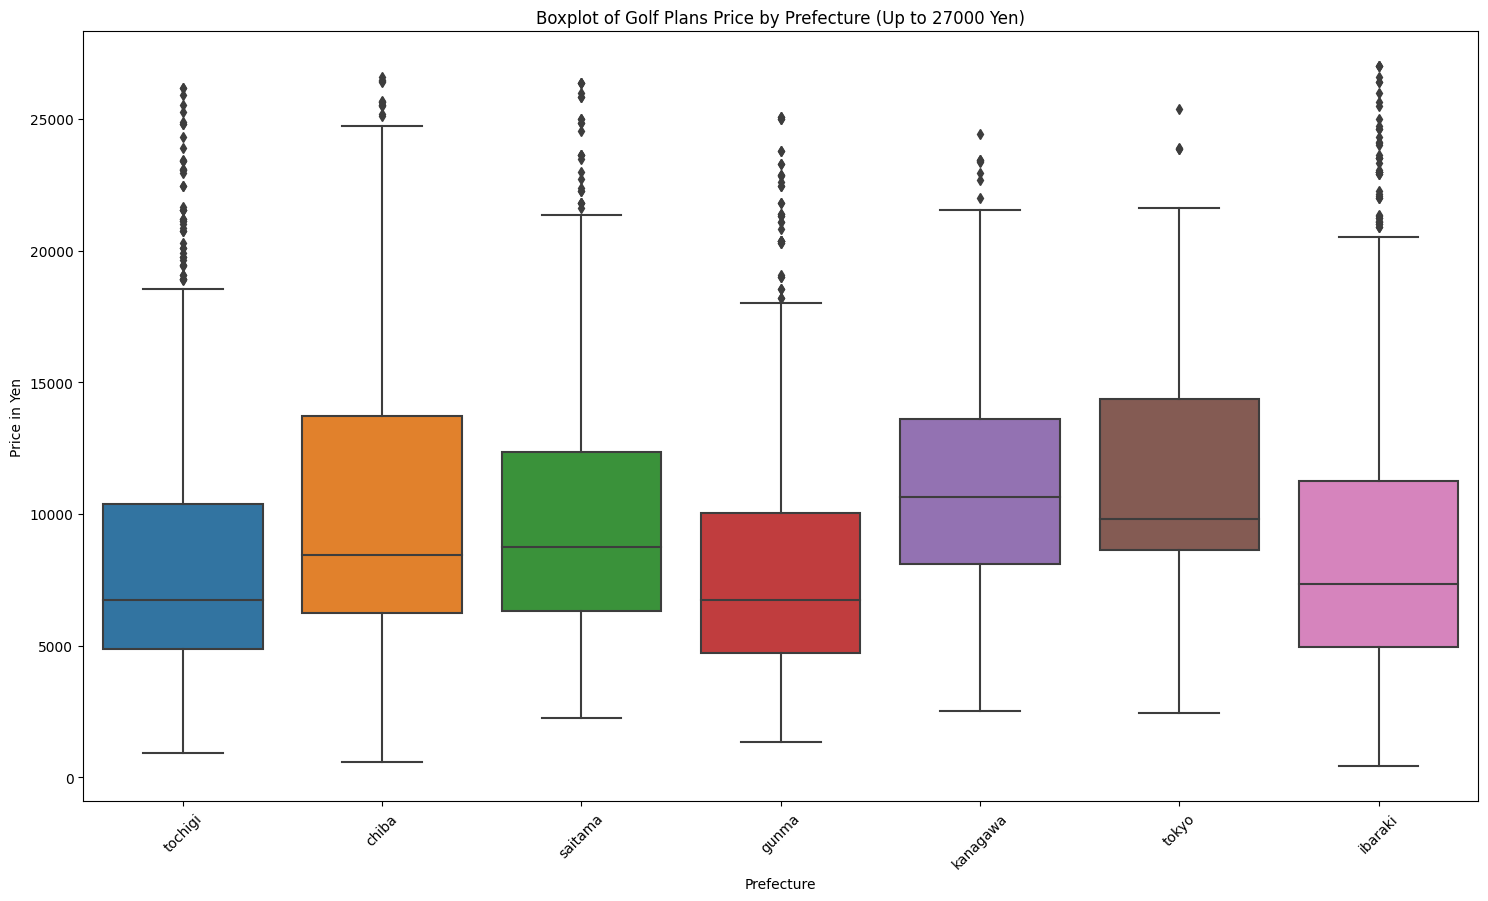

In [10]:
# Filter the data to include only plans with prices less than or equal to 27000 Yen
filtered_golf_data = golf_data[golf_data['Price'] <= 27000]

# Create a boxplot for price distribution across different prefectures within the filtered range
plt.figure(figsize=(18, 10))
sns.boxplot(x='Prefecture', y='Price', data=filtered_golf_data)
plt.title('Boxplot of Golf Plans Price by Prefecture (Up to 27000 Yen)')
plt.xlabel('Prefecture')
plt.ylabel('Price in Yen')
plt.xticks(rotation=45)
plt.show()

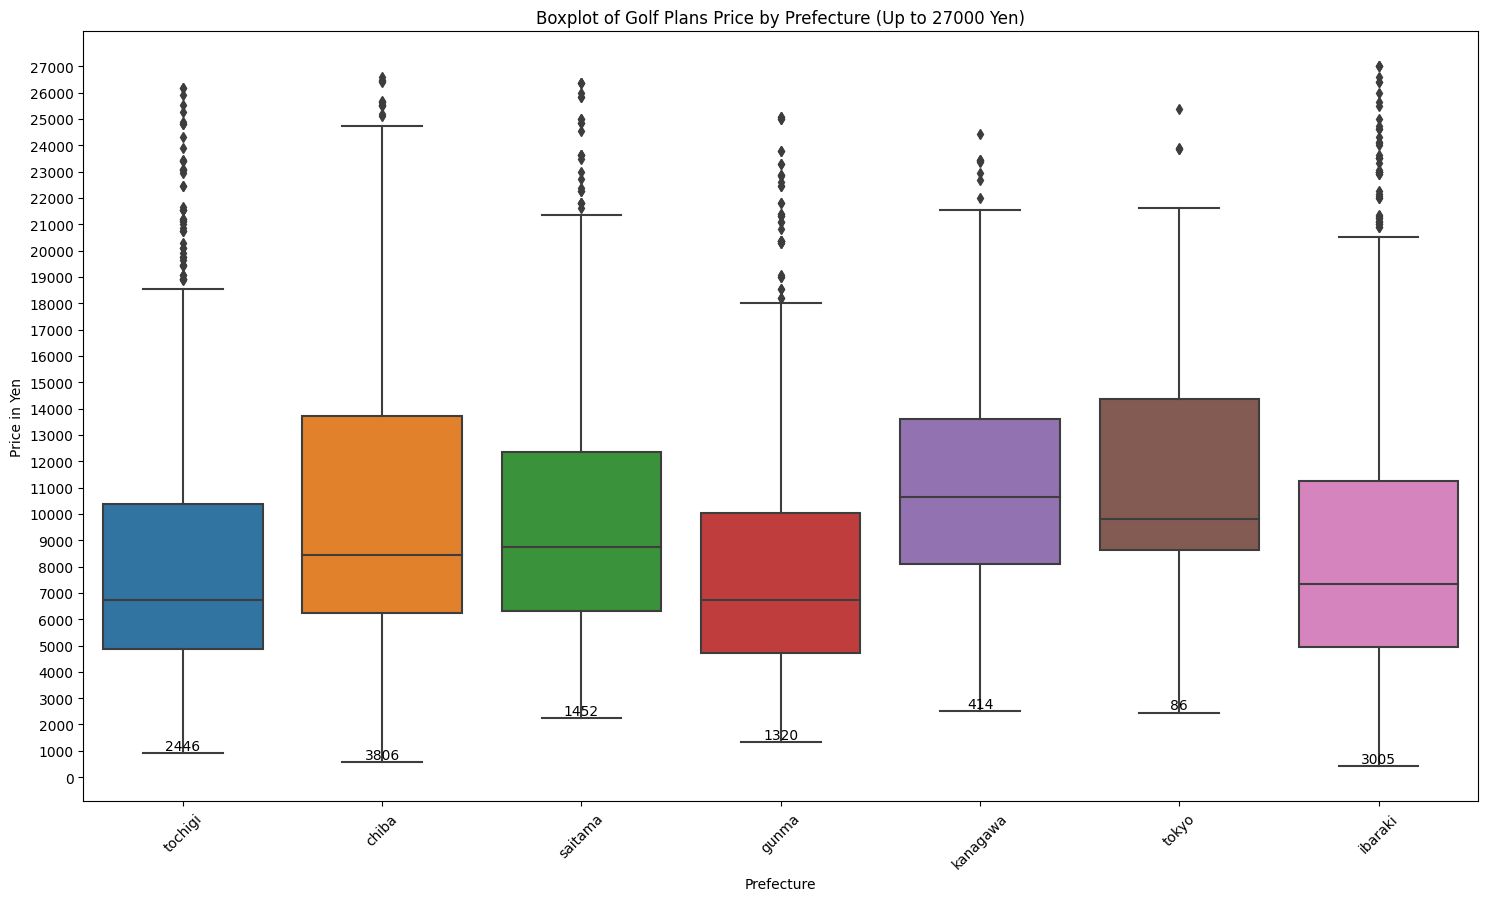

In [23]:
# Create the boxplot and set y-axis ticks at 1000 Yen intervals
plt.figure(figsize=(18, 10))
sns.boxplot(x='Prefecture', y='Price', data=filtered_golf_data)
plt.title('Boxplot of Golf Plans Price by Prefecture (Up to 27000 Yen)')
plt.xlabel('Prefecture')
plt.ylabel('Price in Yen')
plt.yticks(range(0, 28000, 1000))  # Set y-axis ticks at 1000 Yen intervals
plt.xticks(rotation=45)

# Count the number of data points for each Prefecture and annotate the plot
data_count_by_prefecture = filtered_golf_data['Prefecture'].value_counts().reset_index()
data_count_by_prefecture.columns = ['Prefecture', 'Count']

# Find the minimum values for each Prefecture for annotation
min_values_by_prefecture = filtered_golf_data.groupby('Prefecture')['Price'].min().reset_index()

for i, tick in enumerate(plt.xticks()[0]):
    prefecture_name = plt.xticks()[1][i].get_text()
    count = data_count_by_prefecture[data_count_by_prefecture['Prefecture'] == prefecture_name]['Count'].values
    min_value = min_values_by_prefecture[min_values_by_prefecture['Prefecture'] == prefecture_name]['Price'].values
    
    if len(count) > 0 and len(min_value) > 0:
        plt.text(tick, min_value[0], str(count[0]), horizontalalignment='center', verticalalignment='bottom', color='black')

plt.show()